# **STAT 301 Project Plan, Method & Computational Code**

In [28]:
#Load libraries
library(tidyverse)
library(broom)

## Data Description

The table below provides a summary of the dataset, including variable names, data types, and descriptions.

| **Variable**                | **Data Type** | **Description** |
|-----------------------------|-------------|-----------------------------------------------|
| StudentID                   | integer     | Student ID |
| CGPA                        | float     | Overall grades achieved by the student |
| Internships                 | integer     | Number of internships a student has done |
| Projects                    | integer     | Number of projects a student has done |
| Workshops.Certifications     | integer     | Number of online certifications/workshops completed |
| AptitudeTestScore           | integer     | Aptitude test score to assess logical thinking |
| SoftSkillsRating            | numeric     | Communication rating affecting placement chances |
| ExtracurricularActivities   | boolean     | Whether the student participated in extracurriculars |
| PlacementTraining           | boolean     | Whether the student received placement training |
| SSC_Marks                   | integer     | Senior Secondary Marks|
| HSC_Marks                   | integer     | Higher Secondary Marks |
| PlacementStatus             | boolean     | Whether a student was placed (TRUE/FALSE) |

The dataset contains student placement records with 12 variables and 10000 observations. The dataset includes academic performance features (CGPA, SSC Marks, and HSC Marks), extracurricular involvement, internships, and soft skills rating. The target variable is Placement status, which tells us whether a student was placed or not. The dataset was sourced from Kaggle: (https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data.

## Research Question

**How are different factors such as Academic Performance, Soft Skills, and Internships associated with the Placement Status of a given Student?**

I chose this research question as it will identify the factors most associated with a Placement for a given student. It will allow me to use my inference skills (Use statistical analysis to identify the most significant factors affecting placement outcomes). As student that will soon be looking for placement's myself, it will help provide student's like me more insights into improving career readiness and ensure the best chance at a placement!

## EDA & Visualization

In [22]:
#load the data via a github link
placement_df <- read.csv("https://raw.githubusercontent.com/Vedkal19/placement-data/main/placementdata.csv")

# Convert character columns to logical binary 1/0 for inference
placement_df <- placement_df %>%
  mutate(
    PlacementStatus = ifelse(PlacementStatus == "Placed", 1, 0),
    PlacementTraining = ifelse(PlacementTraining == "Yes", 1, 0),
    ExtracurricularActivities = ifelse(ExtracurricularActivities == "Yes", 1, 0)
  )

#Checking the structure of the dataset
str(placement_df)

#Checking for missing values
colSums(is.na(placement_df)) 

'data.frame':	10000 obs. of  12 variables:
 $ StudentID                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CGPA                     : num  7.5 8.9 7.3 7.5 8.3 7 7.7 7.7 6.5 7.8 ...
 $ Internships              : int  1 0 1 1 1 0 1 2 1 1 ...
 $ Projects                 : int  1 3 2 1 2 2 1 1 1 3 ...
 $ Workshops.Certifications : int  1 2 2 2 2 2 1 0 0 2 ...
 $ AptitudeTestScore        : int  65 90 82 85 86 71 76 85 84 79 ...
 $ SoftSkillsRating         : num  4.4 4 4.8 4.4 4.5 4.2 4 3.5 3.9 4.4 ...
 $ ExtracurricularActivities: num  0 1 1 1 1 1 0 1 0 1 ...
 $ PlacementTraining        : num  0 1 0 1 1 0 0 1 1 1 ...
 $ SSC_Marks                : int  61 78 79 81 74 55 62 59 75 85 ...
 $ HSC_Marks                : int  79 82 80 80 88 66 65 72 71 86 ...
 $ PlacementStatus          : num  0 1 0 1 1 0 0 0 0 1 ...


StudentID                      CGPA               Internships 
                        0                         0                         0 
                 Projects  Workshops.Certifications         AptitudeTestScore 
                        0                         0                         0 
         SoftSkillsRating ExtracurricularActivities         PlacementTraining 
                        0                         0                         0 
                SSC_Marks                 HSC_Marks           PlacementStatus 
                        0                         0                         0

The dataset is already tidy:
- Each row represents one student/ observation
- Each column represents one variable
- Each cell contains a single value
- There are no missing values

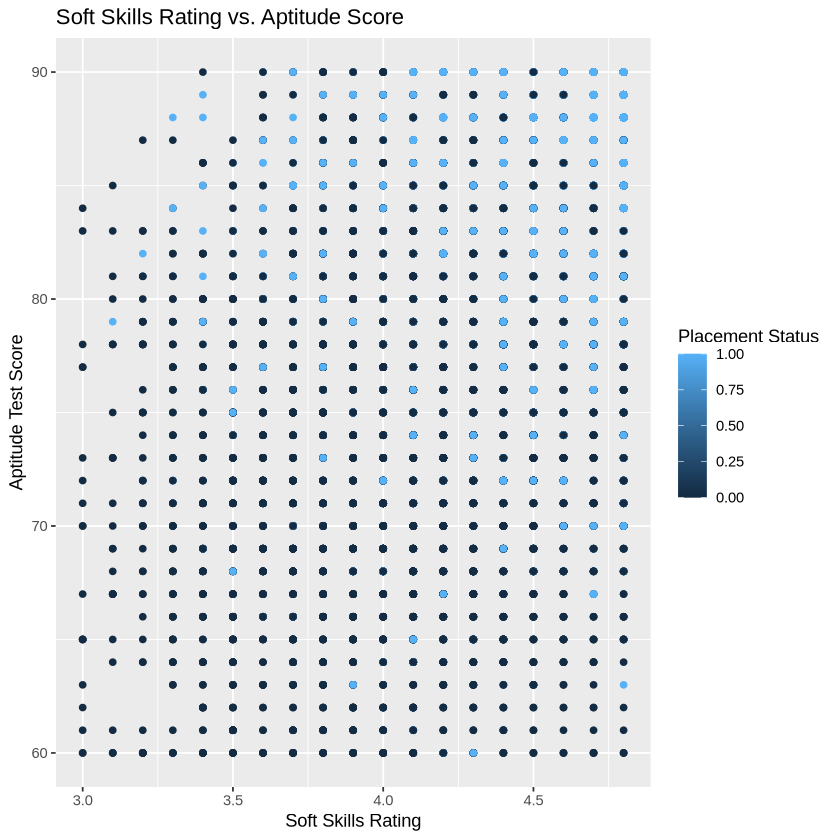

In [23]:
ggplot(placement_df, aes(x = SoftSkillsRating, y = AptitudeTestScore, color = PlacementStatus)) +
  geom_point() +
  labs(title = "Soft Skills Rating vs. Aptitude Score",
       x = "Soft Skills Rating",
       y = "Aptitude Test Score",
       color = "Placement Status")

The scatter plot above helps us explore the relationship between Soft Skills Rating, Aptitude Test Score, and Placement Status. This helps us investigate two key factors in relation to Placement Status. We can see that the students with a higher Aptitude Test score and Soft Skills rating seem to be placed more compared to students that have lower rating/ score in either feature as there is a higher density of blue dots in the top right of the graph compared to the bottom left. This helps us understand that these two factors might be quite important in predicting whether a student gets placed or not.

## Method and Plan

#### Proposed Method:

I will use a logistic regression model to explore my research question. This model is ideal for the response variable PlacementStatus, a binary variable indicating whether or not a student got placed. The explanatory variables include academic performance (CGPA), skill-based attributes (SoftSkillsRating, AptitudeTestScore), and experience-related factors (Internships, Projects, PlacementTraining, and ExtracurricularActivities), etc.

#### Why this is an appropriate method:

Logistic regression is best suited for modelling the relationship between one or more explanatory variables and a binary response variable. It will allow us to assess how each explanatory factor is associated with the likelihood of a student being placed. We will do this by estimating odds ratios and evaluating statistical significance. This method helps us with our inference-based focus of the analysis as it will help us understand associations.

#### Assumptions required for this method:

- Each student case (observation) is independent of each other
- Log-odds of the response are linearly related to the explanatory variables
- All important variables are included in the dataset

#### Potential Limitations of this method:

- Logistic Regression only reveals association and does not reveal any causation
- May perform poorly if there is class imbalance
- Intercations and/or nonlinear effects will need to be explicitly modeled

## Computational Code and Output

In [51]:
#Fitting logistic regression model to predict PlacementStatus, using all variables barring StudentID
# StudentID is excluded because it's just an identifier
full_model <- glm(PlacementStatus ~ . -StudentID,data = placement_df, family = binomial)

# Tidy up the model output for easier interpretation
tidy_table <- tidy(full_model, conf.int = TRUE, exponentiate = TRUE) %>%
  filter(term != "(Intercept)") %>%
  mutate(
    p.value = case_when(
      p.value < 0.001 ~ "<0.001",
      TRUE ~ as.character(round(p.value, 3))
    ),
    estimate = round(estimate, 3),
    std.error = round(std.error, 3),
    statistic = round(statistic, 2),
    conf.low = round(conf.low, 3),
    conf.high = round(conf.high, 3)
  ) %>%
  arrange(desc(estimate))

tidy_table


term                      estimate std.error statistic p.value conf.low
1  PlacementTraining         2.519    0.072     12.92     <0.001  2.191   
2  ExtracurricularActivities 2.108    0.067     11.09     <0.001  1.848   
3  SoftSkillsRating          1.946    0.084      7.90     <0.001  1.650   
4  CGPA                      1.471    0.050      7.68     <0.001  1.333   
5  Projects                  1.298    0.037      6.96     <0.001  1.206   
6  Workshops.Certifications  1.154    0.032      4.52     <0.001  1.085   
7  AptitudeTestScore         1.073    0.005     15.02     <0.001  1.063   
8  SSC_Marks                 1.029    0.003      8.99     <0.001  1.022   
9  HSC_Marks                 1.028    0.004      7.21     <0.001  1.020   
10 Internships               1.000    0.043      0.00     0.997   0.920   
   conf.high
1  2.901    
2  2.406    
3  2.296    
4  1.624    
5  1.396    
6  1.228    
7  1.083    
8  1.035    
9  1.036    
10 1.087

#### Interpretation of the model and Issues:

In the full logistic regression model, PlacementTraining has the highest coefficient, indicating that it is the variable most associated with whether a student gets a placement or not. Internships is the only variable that doesn't seem to be statistically significant, which is unexpected given its assumed importance in real-world placement. This could be because very few students had more than one internship, which could have limited the model; converting Internships to a binary variable (Done at least one internship vs No internships) could help with this issue. Since all the other variables seem to be very significant, this could point to multicollinearity or overlapping effects, so we should experiment with interaction terms to help uncover some more meaningful relationships.
